# Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Import given dataset named 'dataset1.csv'

In [23]:
df=pd.read_csv('https://raw.githubusercontent.com/dhanyahari07/Data_Science/master/dataset1.csv',encoding = 'utf-16')

In [24]:
def read_data():
    # Write your code here
    data = df
    number_of_rows, number_of_columns = data.shape
    return data, number_of_rows, number_of_columns
read_data()

(      X    Y
 0    17   78
 1    76  104
 2    81  179
 3   100  243
 4    37   24
 ..  ...  ...
 95   91  131
 96   85  160
 97    5   -9
 98   38   84
 99   98  147
 
 [100 rows x 2 columns],
 100,
 2)

## Split dataset into variable components

In [25]:
def X_Y_split():
    data,m,n = read_data()
    X = data['X'].values
    Y = data['Y'].values
    return X, Y
X_Y_split()

(array([ 17,  76,  81, 100,  37,   3,  59,  76,  25,   9,  32,  34,  66,
         70,  86,  70,  43,  19,  26,  31,  34,  21,  66,  61,  30,  13,
         45,  24,  30,  56,  24,  17,  17,  91,   5,  90,  65,  26,  71,
         12,  26,  22,  62,  73, 100,  34,  68,  67,   3,  92,  43,  54,
         78,  74,  80,  65,  75,  30,  22,  31,  74,  74,  48,  96,  51,
         11,   1,  75,   1,  38,   1,  26,  99,  53,  15,  90,  39,  81,
         10,  83,   3,  69,  50,  94,  33,  70,  49,  30,  84,  17,   4,
          3,  82,  56,  85,  91,  85,   5,  38,  98], dtype=int64),
 array([ 78, 104, 179, 243,  24,  58,  59, 171,  98,  47,  54,  21, 185,
        187, 228, 116, 103,  10,  83, 119,  86,  52, 117,  64,  37,  84,
         58,  88, 114, 100,  -5,  82,  43, 187,   3, 168, 177,  89, 194,
        -11,  -1,  82,  71,  88, 224, 113, 185,  99,  25, 175,  90, 159,
        131, 124, 202, 124, 155,  72,  38,  95, 125, 193, 102, 196, 161,
         68,  57, 206, -26, 123, -21,  41, 206, 158,  12

## Calculate coefficients

In [26]:
def coefficients():
    X, Y = X_Y_split()
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    n = len(X)
    numer = 0
    denom = 0
    for i in range(n):
        numer += (X[i]-mean_x)*(Y[i]-mean_y)
        denom += (X[i]-mean_x)**2
    b1 = numer/denom
    b0 = mean_y - (b1*mean_x)
    ta=round(b1, 3)
    tb=round(b0, 3)
    return ta, tb
coefficients()

(1.819, 12.509)

## Plot the values along with the regression line

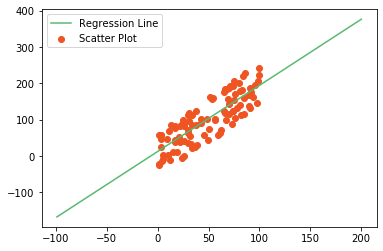

In [31]:
def plot():
    X, Y = X_Y_split()
    b1,b0=coefficients()
    max_x = np.max(X) + 100
    min_x = np.min(X) - 100
    x = np.linspace(min_x, max_x, 1000)
    y = b0 + b1 * x
    plt.plot(x, y, color='#58b970', label='Regression Line')
    plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
    plt.legend();
    plt.show()
plot()

## Compute the RMSE value

In [29]:
def rmse():
    data,n,m = read_data()
    b1, b0 = coefficients()
    X, Y = X_Y_split()
    rmse = 0
    n = len(X)
    for i in range(n):
        y_pred = b0 + b1 *X[i]
        rmse += (Y[i] - y_pred)**2
    rmse = round(np.sqrt(rmse/n),3)
    return rmse
rmse()

36.342

## Compute the R^2 score

In [32]:
def r2():
    data,n,m = read_data()
    b1, b0 = coefficients()
    X, Y = X_Y_split()
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    n = len(X)
    ss_tot = 0
    ss_res = 0
    for i in range(n):
        y_pred = b0 + b1 *X[i]
        ss_tot += (Y[i] - mean_y)**2
        ss_res += (Y[i] - y_pred)**2
    r2 = round(1-(ss_res/ss_tot),3)
    return r2
r2()

0.69

## Compare with values computed using sklearn

In [34]:
def compare_rmse():
    data,n,m = read_data()
    X, Y = X_Y_split()
    old_rmse = rmse()
    old_r2 = r2()
    # Write your code here
    X=X.reshape((n,1))
    reg=LinearRegression()
    reg=reg.fit(X,Y)
    Y_pred=reg.predict(X)
    s_rmse=round(np.sqrt(mean_squared_error(Y,Y_pred)),3)
    s_r2=round(reg.score(X,Y),3)
    return abs(old_rmse-s_rmse), abs(old_r2-s_r2)
compare_rmse()

(0.0, 0.0)